# Movie Recommendation System & Data Analysis (IMDb Top 1000)

In this section, we import essential libraries that will help us explore and analyze the dataset.
- `pandas` for data manipulation.
- `matplotlib` & `seaborn` for data visualization.
- `numpy` for numerical operations.
- `requests` for fetching data from the web.
- `re` for regular expressions.
- `StringIO` for reading string inputs.
- `StandardScaler` for standardizing the data.
- `OneHotEncoder` for encoding categorical features.
- `LabelEncoder` for encoding target labels.
- `MinMaxScaler` for scaling the data.
- `PCA` for dimensionality reduction.
- `euclidean` for calculating the euclidean distance.

In [564]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
import re
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean



## Load Dataset

Let's load the dataset and display the first few rows to understand the structure of the dataset.

In [565]:
url = "https://raw.githubusercontent.com/krishna-koly/IMDB_TOP_1000/refs/heads/main/imdb_top_1000.csv"
response = requests.get(url, verify=False)
data = StringIO(response.text)
df = pd.read_csv(data)
df.to_csv('imdb_top_1000.csv', index=False)

df.head()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## Data Preprocessing Pipeline

### Data Cleaning

Data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a dataset. In this section, we will perform the following data cleaning operations.



Check the types of the columns and see where are the missing values.

In [566]:
print(df.dtypes)
df.isnull().sum()

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object


Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

Convert the `Gross` column to a numerical data type so that we can perform numerical operations on it.

In [567]:
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)
print(df['Gross'].head())

0     28341469.0
1    134966411.0
2    534858444.0
3     57300000.0
4      4360000.0
Name: Gross, dtype: float64


Handling missing values:
- fill missing values with the median of the column for numerical columns.
- fill missing values with the mode of the column for categorical columns.

In [568]:

df.fillna(df.median(numeric_only=True), inplace=True)

for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)



/var/folders/qm/dr81gpz53lzcw2hbj5wb3jcm0000gn/T/ipykernel_6880/141187919.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


Check if the dataset contains null values.

In [569]:
df.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

Handling duplicate records:
- remove duplicate records from the dataset so that we can avoid redundancy.

In [570]:
df.drop_duplicates(inplace=True)

Detect and adress outliers using the IQR method, and remove them from the dataset.

In [571]:
numerical_columns = [ 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

Check the dataset's shape after data cleaning.

In [572]:
df.shape

(814, 16)

Fix inconsistencies in the dataset:



- Display the first few rows of the dataset to see inconsistencies in the data.

In [573]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].unique()[:10]}")

Poster_Link: ['https://m.media-amazon.com/images/M/MV5BNjViNWRjYWEtZTI0NC00N2E3LTk0NGQtMjY4NTM3OGNkZjY0XkEyXkFqcGdeQXVyMjUxMTY3ODM@._V1_UX67_CR0,0,67,98_AL_.jpg'
 'https://m.media-amazon.com/images/M/MV5BYWZjMjk3ZTItODQ2ZC00NTY5LWE0ZDYtZTI3MjcwN2Q5NTVkXkEyXkFqcGdeQXVyODk4OTc3MTY@._V1_UX67_CR0,0,67,98_AL_.jpg'
 'https://m.media-amazon.com/images/M/MV5BOTc2ZTlmYmItMDBhYS00YmMzLWI4ZjAtMTI5YTBjOTFiMGEwXkEyXkFqcGdeQXVyODE5NzE3OTE@._V1_UY98_CR0,0,67,98_AL_.jpg'
 'https://m.media-amazon.com/images/M/MV5BOTMwYjc5ZmItYTFjZC00ZGQ3LTlkNTMtMjZiNTZlMWQzNzI5XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UX67_CR0,0,67,98_AL_.jpg'
 'https://m.media-amazon.com/images/M/MV5BMjlmZmI5MDctNDE2YS00YWE0LWE5ZWItZDBhYWQ0NTcxNWRhXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX67_CR0,0,67,98_AL_.jpg'
 'https://m.media-amazon.com/images/M/MV5BYmJmM2Q4NmMtYThmNC00ZjRlLWEyZmItZTIwOTBlZDQ3NTQ1XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX67_CR0,0,67,98_AL_.jpg'
 'https://m.media-amazon.com/images/M/MV5BYjBmYTQ1NjItZWU5MS00YjI0LTg2OTYtYmFkN2JkMmNiNWVkXkE

- standardize case for columns.
- eliminate non-ASCII characters from the dataset.
- convert `Runtime` column to integer type.
- convert `Released Year` to integer type.

In [574]:

df['Series_Title'] = df['Series_Title'].str.title()
df['Certificate'] = df['Certificate'].str.upper()

text_columns = ['Series_Title', 'Star1', 'Star2', 'Star3', 'Star4']
for column in text_columns:
    df[column] = df[column].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))

df['Runtime'] = df['Runtime'].str.extract(r'(\d+)').astype(int)
df['Released_Year'] = df['Released_Year'].astype(int)


### Data Transformation & Feature Engineering
Data transformation is the process of converting data from one format or structure into another format or structure. Feature engineering is the process of using domain knowledge to extract features from raw data. In this section, we will perform the following data transformation and feature engineering operations.

We identify numerical columns and create new features by performing mathematical operations on them for better analysis.Then we apply standard scaling to the numerical columns.
- The `Gross_per_vote` is created to normalize the gross revenue by the number of votes. It provides a measure of how much revenue each vote corresponds to, which can be useful in understanding the popularity and financial success of a movie relative to its audience engagement. High Gross_per_Vote values might indicate movies that are both popular and financially successful.

- The `Runtime_per_year` is created to normalize the runtime of a movie by the year it was released. It provides a measure of how long a movie is relative to the year it was released, which can be useful in understanding how movie runtimes have changed over time.

In [575]:
df['Gross_per_Vote'] = df['Gross'] / df['No_of_Votes']
df['Runtime_per_year'] = df['Runtime'] / (2025 - df['Released_Year'])
numerical_features = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Gross_per_Vote', 'Runtime', 'Released_Year', 'Runtime_per_year']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

We encode `Genre` column using the get_dummies method to convert categorical column into numerical column.

In [576]:
df['Genre'] = df['Genre'].str.split(',').apply(lambda x: [genre.strip() for genre in x])

genre_dummies = df['Genre'].apply(lambda x: pd.Series(1, index=x)).fillna(0)

df = df.drop('Genre', axis=1).join(genre_dummies)


Let's encode the categorical features with ordinal relationship or many categories.

In [577]:
label_encoder = LabelEncoder()
for feature in ['Director', 'Star1', 'Star2', 'Star3', 'Star4']:
    df[feature] = label_encoder.fit_transform(df[feature])


### Data Reduction
Data reduction is the process of reducing the volume but producing the same or similar analytical results. In this section, we will perform the following data reduction operations.

Perform dimensionality reduction using the `PCA` class to reduce the number of features in the dataset.

In [578]:
pca = PCA(n_components=4)
df[['PC1', 'PC2', 'PC3', 'PC4']] = pca.fit_transform(df[numerical_features])

df.drop(columns=numerical_features + ['Poster_Link', 'Overview', 'Certificate'], inplace=True)
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio by each component:", explained_variance_ratio)


df_cleaned = df.copy()

df_cleaned.to_csv('imdb_top_1000_cleaned.csv', index=False)
df = pd.read_csv('IMDB_TOP_1000_Cleaned.csv')

df.head()




Explained variance ratio by each component: [0.26394018 0.2031857  0.1699311  0.14372426]


,Series_Title,Director,Star1,Star2,Star3,Star4,Biography,Drama,History,Comedy,...,Western,Horror,Sci-Fi,Musical,Film-Noir,Sport,PC1,PC2,PC3,PC4
0,Hamilton,428,345,542,405,602,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.269373,-2.689518,-0.355607,3.348302
1,Gisaengchung,49,306,403,112,129,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.948301,-2.626209,2.324454,0.868201
2,Soorarai Pottru,411,514,423,528,49,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.342420,-2.221270,-0.581012,2.850448
3,Cidade De Deus,114,305,25,400,491,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.142668,-2.403911,2.547103,-0.808751
4,Sen To Chihiro No Kamikakushi,149,137,643,493,634,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.486681,-2.877399,2.836958,-0.376792


Justification:
 1. **Improved Performance:** Reducing the number of features can decrease the computational cost and time required for training machine learning models.
 2. **Reduced Overfitting:** By removing irrelevant or redundant features, the model is less likely to overfit to the training data.
 3. **Enhanced Interpretability:** With fewer features, it is easier to interpret the model's predictions and understand the relationships between features.

## Extracting & Visualizing Insights 

In this section, we will extract insights from the dataset and visualize them using various plots, such as histograms, scatter plots, and box plots.

#### 1. Top Directors with the Most Movies
- **Insight**: Identify the directors with the most movies in the dataset.
- **Visualization**: Bar Plot
- **Why It's Important**: Understanding which directors have the most movies in the top 1000 helps identify prolific filmmakers whose work is consistently highly rated. This can highlight trends in director influence and audience preference.

/var/folders/qm/dr81gpz53lzcw2hbj5wb3jcm0000gn/T/ipykernel_6880/2428096959.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.index, y=top_directors.values, palette='viridis')


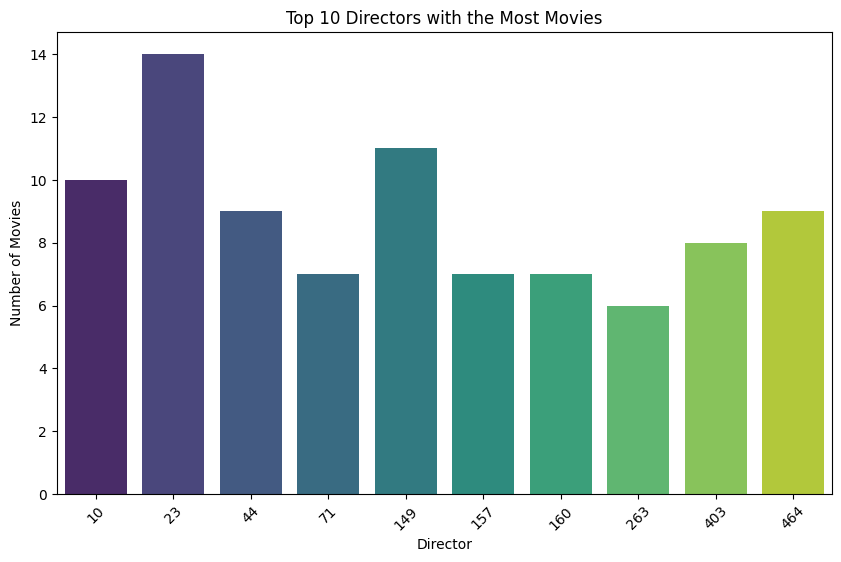

In [579]:
top_directors = df['Director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='viridis')
plt.title('Top 10 Directors with the Most Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

#### 2. Distribution of Movies per Director
- **Insight**: Visualize the distribution of the number of movies directed by each director in the dataset.
- **Visualization**: Histogram
- **Why It's Important**: Understanding the distribution of movies per director helps identify trends in director productivity. It shows whether most directors have directed only a few movies or if there are directors with a large number of movies.
- **What It Tells Us**: If the distribution is right-skewed, it suggests that most directors have directed only a few movies, while a few directors have directed many.

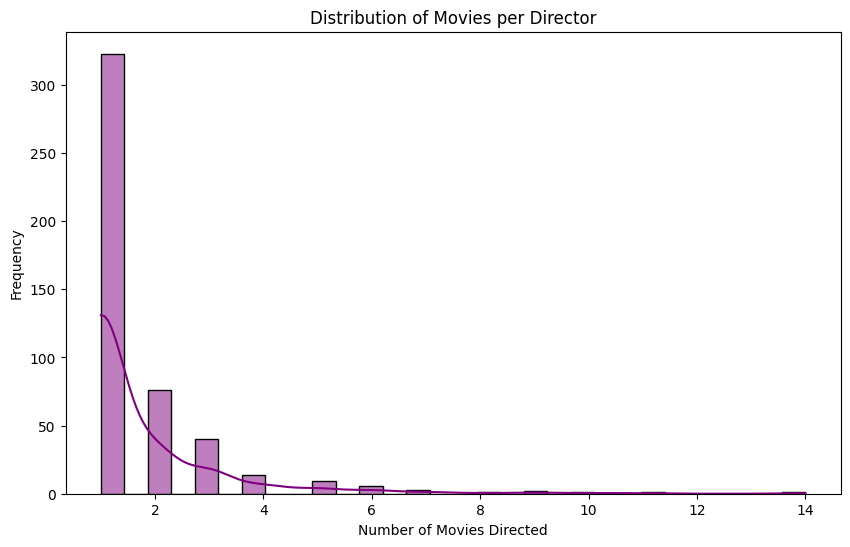

In [580]:

director_movie_counts = df['Director'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(director_movie_counts, bins=30, kde=True, color='purple')
plt.title('Distribution of Movies per Director')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Frequency')
plt.show()

#### 3. Top Genres in the Dataset
- **Insight**: Identify the most common genres in the top 1000 movies.
- **Visualization**: Bar Plot
- **Why It's Important**: Genres reflect audience preferences and trends. Knowing the most popular genres helps filmmakers and studios understand what audiences value.

/var/folders/qm/dr81gpz53lzcw2hbj5wb3jcm0000gn/T/ipykernel_6880/1959605099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='magma')


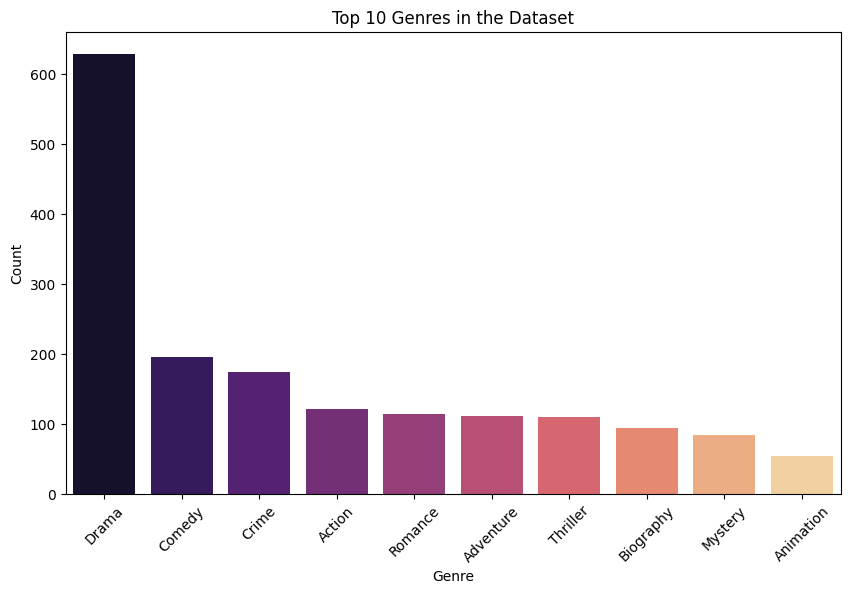

In [581]:
genre_counts = df.iloc[:, 6:27].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='magma')
plt.title('Top 10 Genres in the Dataset')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### 4. Distribution of Title Lengths
- **Insight**: Visualize the distribution of movie title lengths (number of characters).
- **Visualization**: Histogram
- **Why It's Important**: Understanding the distribution of title lengths helps identify common trends in movie naming conventions.
- **What It Tells Us**: If most titles are between 10-20 characters, it suggests a preference for concise naming. Longer titles might indicate more descriptive or creative naming.

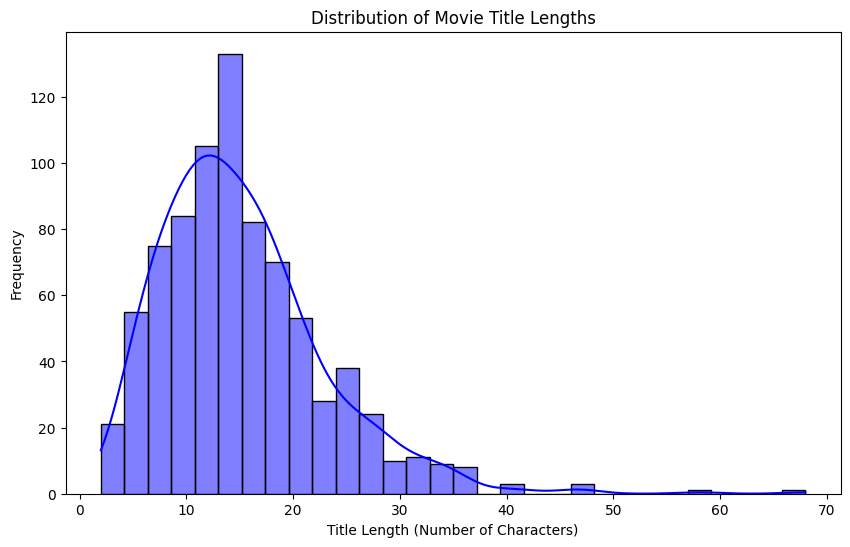

In [582]:
df['Title_Length'] = df['Series_Title'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['Title_Length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Movie Title Lengths')
plt.xlabel('Title Length (Number of Characters)')
plt.ylabel('Frequency')
plt.show()

#### 5. Movies with the Longest Titles
- **Insight**: Identify the movies with the longest titles in the dataset.
- **Visualization**: Bar Plot
- **Why It's Important**: Long titles can be memorable or descriptive, and analyzing them can reveal trends in how movies are named. It’s also a fun way to explore the dataset!
- **What It Tells Us**: If certain movies have exceptionally long titles, it might indicate a trend in detailed or creative naming conventions.

/var/folders/qm/dr81gpz53lzcw2hbj5wb3jcm0000gn/T/ipykernel_6880/3418639232.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=longest_titles['Series_Title'], y=longest_titles['Title_Length'], palette='Blues_r')
/Users/alexandrucrisan/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


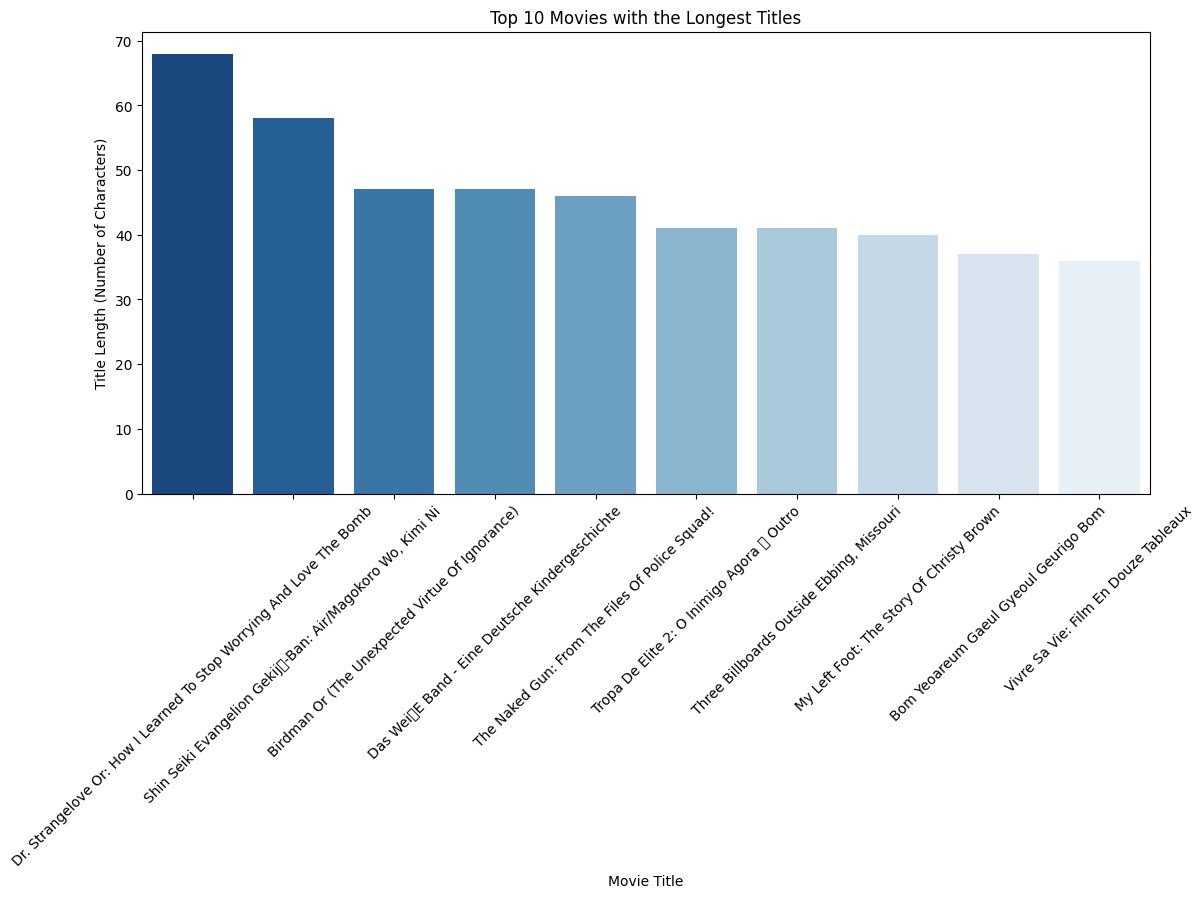

In [583]:

df['Title_Length'] = df['Series_Title'].apply(lambda x: len(x))

longest_titles = df.sort_values(by='Title_Length', ascending=False).head(10)

plt.figure(figsize=(13, 6))
sns.barplot(x=longest_titles['Series_Title'], y=longest_titles['Title_Length'], palette='Blues_r')
plt.title('Top 10 Movies with the Longest Titles')
plt.xlabel('Movie Title')
plt.ylabel('Title Length (Number of Characters)')
plt.xticks(rotation=45)
plt.show()

#### 6. Top Stars in the Dataset
- **Insight**: Identify the most frequent actors/actresses (Star1, Star2, Star3, Star4) in the dataset.
- **Visualization**: Bar Plot
- **Why It's Important**: Stars are a key factor in a movie's success. Knowing the most frequent stars helps identify influential actors/actresses.

/var/folders/qm/dr81gpz53lzcw2hbj5wb3jcm0000gn/T/ipykernel_6880/2723229916.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stars.index, y=top_stars.values, palette='viridis')


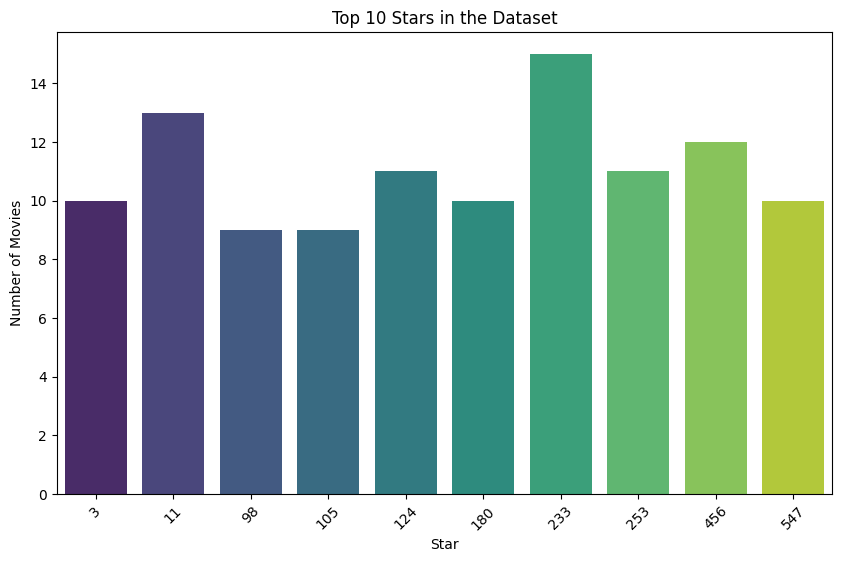

In [584]:
stars = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']])
top_stars = stars.value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_stars.index, y=top_stars.values, palette='viridis')
plt.title('Top 10 Stars in the Dataset')
plt.xlabel('Star')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

#### 7. Top Movie Titles
- **Insight**: Identify the most frequent movie titles in the dataset.
- **Visualization**: Bar Plot
- **Why It's Important**: Movie titles can reflect trends in storytelling or branding. Knowing the most frequent titles helps identify popular themes or franchises.
- **What It Tells Us**: If certain titles appear frequently, it suggests they are part of successful franchises or series.

/var/folders/qm/dr81gpz53lzcw2hbj5wb3jcm0000gn/T/ipykernel_6880/2133912106.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.index, y=top_titles.values, palette='viridis')
/Users/alexandrucrisan/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


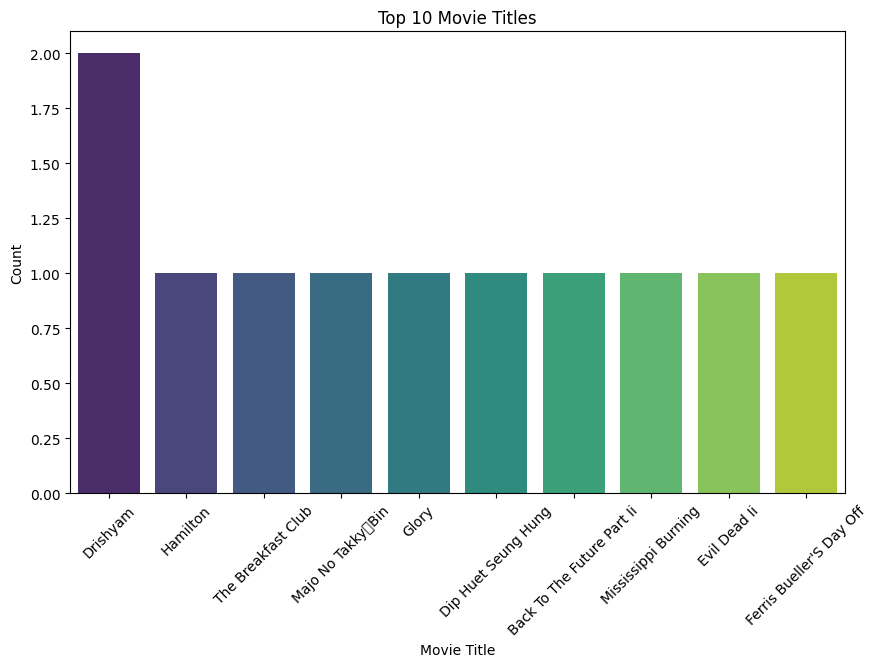

In [585]:

top_titles = df['Series_Title'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_titles.index, y=top_titles.values, palette='viridis')
plt.title('Top 10 Movie Titles')
plt.xlabel('Movie Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### 8. Top Actor Pairs in the Dataset
- **Insight**: Identify the most frequent actor pairs (e.g., `Star1` and `Star2`) in the dataset.
- **Visualization**: Bar Plot
- **Why It's Important**: Actor pairs can indicate strong on-screen chemistry or frequent collaborations. Knowing the most frequent pairs helps identify popular duos that audiences enjoy.
- **What It Tells Us**: If certain pairs appear frequently, it suggests they are highly sought after or consistently part of successful movies.

/var/folders/qm/dr81gpz53lzcw2hbj5wb3jcm0000gn/T/ipykernel_6880/3758165229.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actor_pair_counts.index, y=actor_pair_counts.values, palette='viridis')


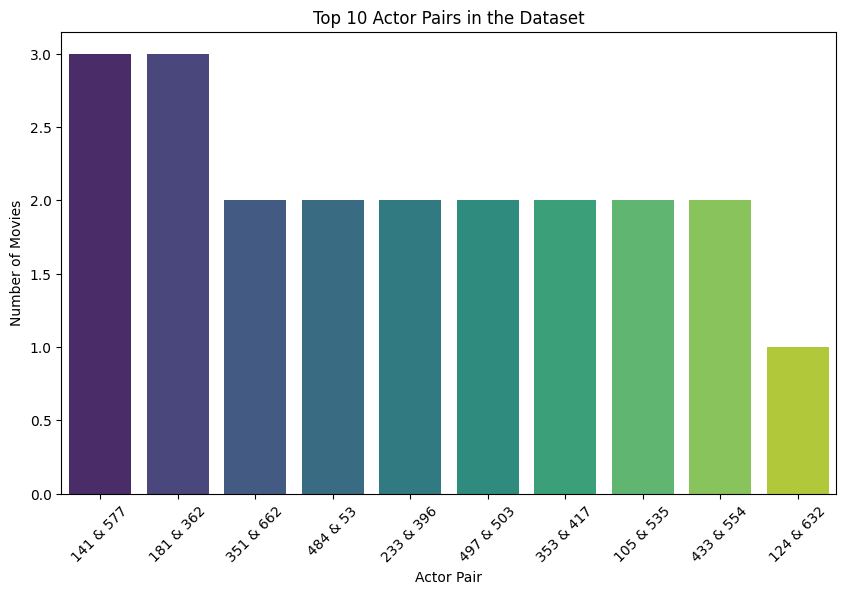

In [586]:

df['Actor_Pair'] = df.apply(lambda row: tuple(sorted([str(row['Star1']), str(row['Star2'])])), axis=1)
df['Actor_Pair_Str'] = df['Actor_Pair'].apply(lambda x: ' & '.join(x))

actor_pair_counts = df['Actor_Pair_Str'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=actor_pair_counts.index, y=actor_pair_counts.values, palette='viridis')
plt.title('Top 10 Actor Pairs in the Dataset')
plt.xlabel('Actor Pair')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

#### 9. Top Director-Actor Collaborations
- **Insight**: Identify the most frequent director-actor pairs in the dataset.
- **Visualization**: Bar Plot
- **Why It's Important**: Frequent collaborations between directors and actors can indicate strong working relationships or mutual success. This helps identify which directors and actors consistently work together.
- **What It Tells Us**: If certain director-actor pairs appear frequently, it suggests they have a successful

/var/folders/qm/dr81gpz53lzcw2hbj5wb3jcm0000gn/T/ipykernel_6880/2415700587.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_actor_counts.index, y=director_actor_counts.values, palette='viridis')


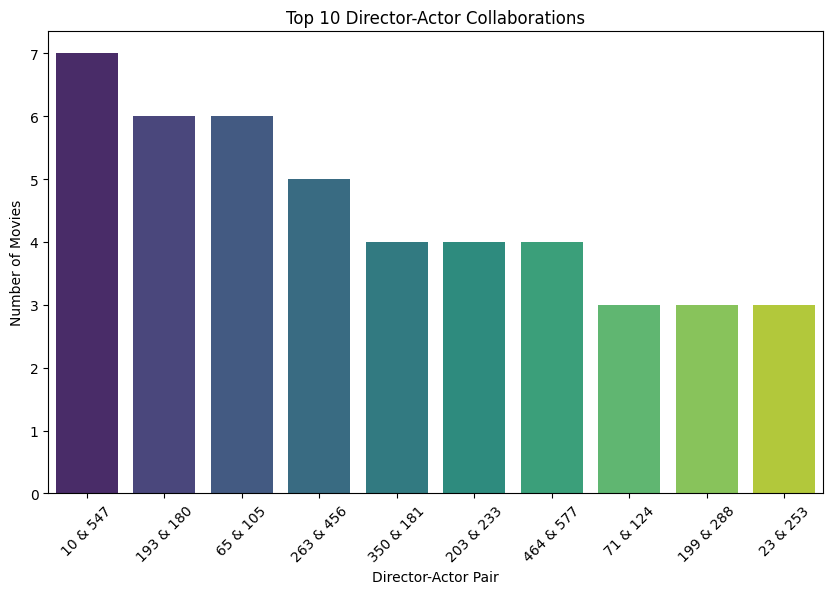

In [587]:

df['Director_Actor_Pair'] = df.apply(lambda row: (row['Director'], row['Star1']), axis=1)

director_actor_counts = df['Director_Actor_Pair'].value_counts().head(10)

director_actor_counts.index = director_actor_counts.index.map(lambda x: f"{x[0]} & {x[1]}")

plt.figure(figsize=(10, 6))
sns.barplot(x=director_actor_counts.index, y=director_actor_counts.values, palette='viridis')
plt.title('Top 10 Director-Actor Collaborations')
plt.xlabel('Director-Actor Pair')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

#### 10. Actors Who Worked with Multiple Directors
- **Insight**: Identify actors who have worked with the most number of unique directors.
- **Visualization**: Bar Plot
- **Why It's Important**: This helps identify versatile actors who collaborate with a wide range of directors, showcasing their adaptability.
- **What It Tells Us**: If an actor has worked with many directors, it suggests they are in high demand and can adapt to different directing styles.

/var/folders/qm/dr81gpz53lzcw2hbj5wb3jcm0000gn/T/ipykernel_6880/4282986399.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors['Star1'], y=top_actors['Unique_Directors'], palette='viridis')


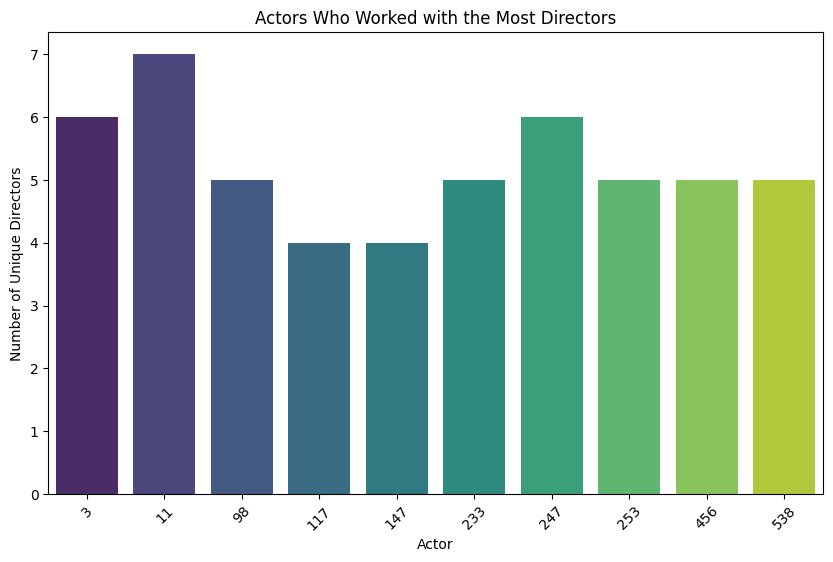

In [588]:

actor_director_counts = df.groupby('Star1')['Director'].nunique().reset_index(name='Unique_Directors')

top_actors = actor_director_counts.sort_values(by='Unique_Directors', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors['Star1'], y=top_actors['Unique_Directors'], palette='viridis')
plt.title('Actors Who Worked with the Most Directors')
plt.xlabel('Actor')
plt.ylabel('Number of Unique Directors')
plt.xticks(rotation=45)
plt.show()


## Movie Recommendation System (Without AI)



### Movie Recommendation System Using Euclidean Distance

This recommendation system suggests movies based on **feature similarity**. It uses features like **director**, **actors**, **genres**, and **PCA components** to calculate how similar two movies are. The system works by normalizing the features, computing the **Euclidean distance** between movies, and recommending the movies with the smallest distances.

---

#### Steps in the Recommendation System

1. **Feature Selection**:
   - Use the following features:
     - **Director**: Encoded as numerical values.
     - **Actors**: Encoded as numerical values (`Star1`, `Star2`, `Star3`, `Star4`).
     - **Genres**: Binary columns (e.g., `Biography`, `Drama`, `Action`, etc.).
     - **PCA Components**: Numerical columns (`PC1`, `PC2`, `PC3`, `PC4`).

2. **Normalization**:
   - Normalize the feature matrix using **MinMaxScaler** to ensure that all features are on the same scale.

3. **Euclidean Distance**:
   - Compute the **Euclidean distance** between the feature vector of the input movie and all other movies. Movies with smaller distances are more similar.

4. **Recommendation**:
   - Return the **top 5 most similar movies**


In [589]:

feature_columns = [
    'Director', 'Star1', 'Star2', 'Star3', 'Star4', 
    'Biography', 'Drama', 'History', 'Comedy', 'Thriller', 'Crime', 'Animation', 
    'Adventure', 'Family', 'Romance', 'Action', 'Mystery', 'Fantasy', 'Music', 
    'War', 'Western', 'Horror', 'Sci-Fi', 'Musical', 'Film-Noir', 'Sport', 
    'PC1', 'PC2', 'PC3', 'PC4' 
]

df_cleaned = pd.read_csv('IMDB_TOP_1000_Cleaned.csv')

feature_matrix = df_cleaned[feature_columns]

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(feature_matrix)

def recommend_movies(movie_title, top_n=5):
    
    movie_index = df_cleaned[df_cleaned['Series_Title'] == movie_title].index[0]
    
    input_movie_features = normalized_features[movie_index]
    
    distances = []
    for i, row in enumerate(normalized_features):
        if i != movie_index:
            distance = euclidean(input_movie_features, row)
            distances.append((i, distance))
    
    distances.sort(key=lambda x: x[1])
    top_movies = distances[:top_n]
    recommended_movies = [df_cleaned.iloc[movie[0]]['Series_Title'] for movie in top_movies]
    
    return recommended_movies



In [591]:
movie_title = "The Notebook" 
recommended_movies = recommend_movies(movie_title)
print(f"Top 5 movies similar to '{movie_title}':")
for movie in recommended_movies:
    print(movie)


Top 5 movies similar to 'The Notebook':
Before Sunset
Brokeback Mountain
The Lunchbox
The Perks Of Being A Wallflower
The Fault In Our Stars
